In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
diamonds= pd.read_csv('diamonds.csv')
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Lista de variables:

* **carat**: Quilates, los quilates es la medida en la que se denota el peso de un diamante.

* **cut**: Corte, este se refiere a como las facetas de un diamante interectuan con la luz.
* **color**: Color, El color se refiere al tinte natural inherente en los diamantes blancos. Naturalmente la mayoría de los diamantes blancos tienen un tono ligero de color amarillo. Mientras mas incoloro sea, un diamante es más raro.

* **clarity**: Claridad, La claridad es una medida de pureza y rareza del diamante clasificada por la visibilidad de estas caracteristicas bajo una amplificacion de 10x. Una piedra se clasifica como impecable si, bajo una amplificacion de 10x, no tiene inclusiones (imperfecciones internas) y no hay manchas visibles (imperfecciones externas).

* **depth**: Profundidad, la profundidad es una medida de los diamantes que denotala altura total del diamante desde la mesa (la parte superior plana) hasta la parte inferior.

* **table**: Tabla o mesa, el parte plana superior de un diamante.

* **price**: Precio, es le valor de un diamante basado en sus caracteristicas.

* **x**, **y**, **z**: Son las dimenciones del diamante.

Funete: https://www.tiffany.com.mx/engagement/the-tiffany-guide-to-diamonds/ , https://www.baunat.com/


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [31]:
for column in diamonds.select_dtypes(include=[object]):
    print(diamonds[column].value_counts(), "\n")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 



In [15]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [27]:
print('Caracteristicas del diamante más caro:' )
print('\n',diamonds[diamonds['price']==diamonds['price'].max()])
print('-------------------------------------------------------------------')
print('Caracteristicas del diamante más barato:')
print('\n',diamonds[diamonds['price']==diamonds['price'].min()])
print('-------------------------------------------------------------------')
print('Caracteristicas del diamante con más quilates:')
print('\n',diamonds[diamonds['carat']==diamonds['carat'].max()])
print('-------------------------------------------------------------------')
print('Caracteristicas del diamante con menos quilates:')
print('\n',diamonds[diamonds['carat']==diamonds['carat'].min()].head(4))


Caracteristicas del diamante más caro:

        carat      cut color clarity  depth  table  price    x     y     z
27749   2.29  Premium     I     VS2   60.8   60.0  18823  8.5  8.47  5.16
-------------------------------------------------------------------
Caracteristicas del diamante más barato:

    carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
-------------------------------------------------------------------
Caracteristicas del diamante con más quilates:

        carat   cut color clarity  depth  table  price      x      y     z
27415   5.01  Fair     J      I1   65.5   59.0  18018  10.74  10.54  6.98
-------------------------------------------------------------------
Caracteristicas del diamante con menos quilates:

        carat      cut color clarity  depth  table  price     x     y     z
14       0.2  Premium     E 

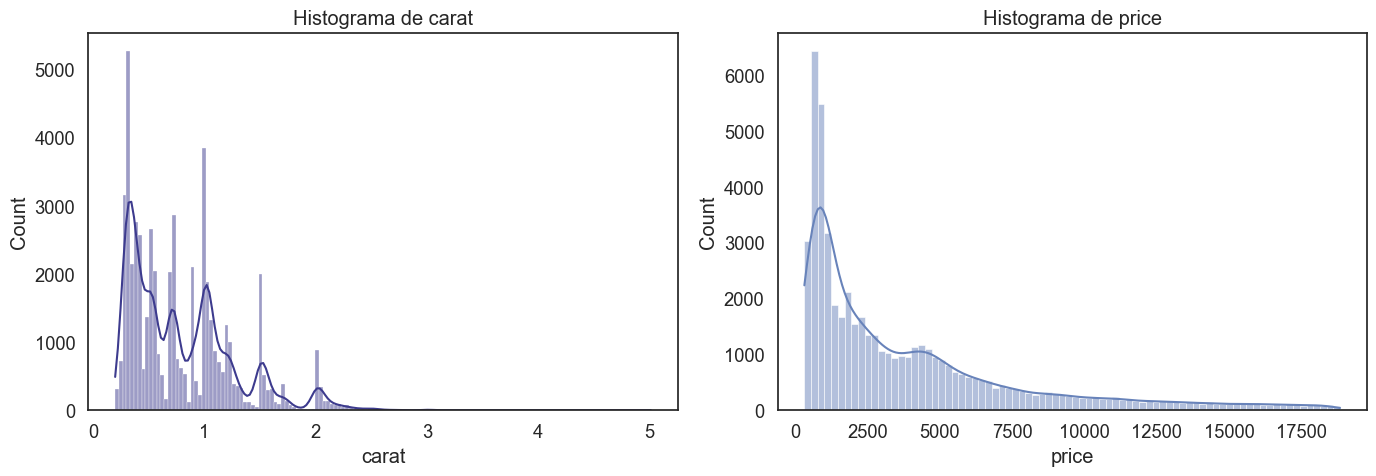

In [87]:
columns= ['carat','price']
colors = ["#3D3B8E", "#6883BA"]
fig, axes  = plt.subplots(1, 2, figsize=(14, 5))
sns.set_style("white")
for ax, column, colors in zip(axes,columns,colors):
    sns.histplot(data= diamonds, x=column, ax= ax, color=colors, kde= True)
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()



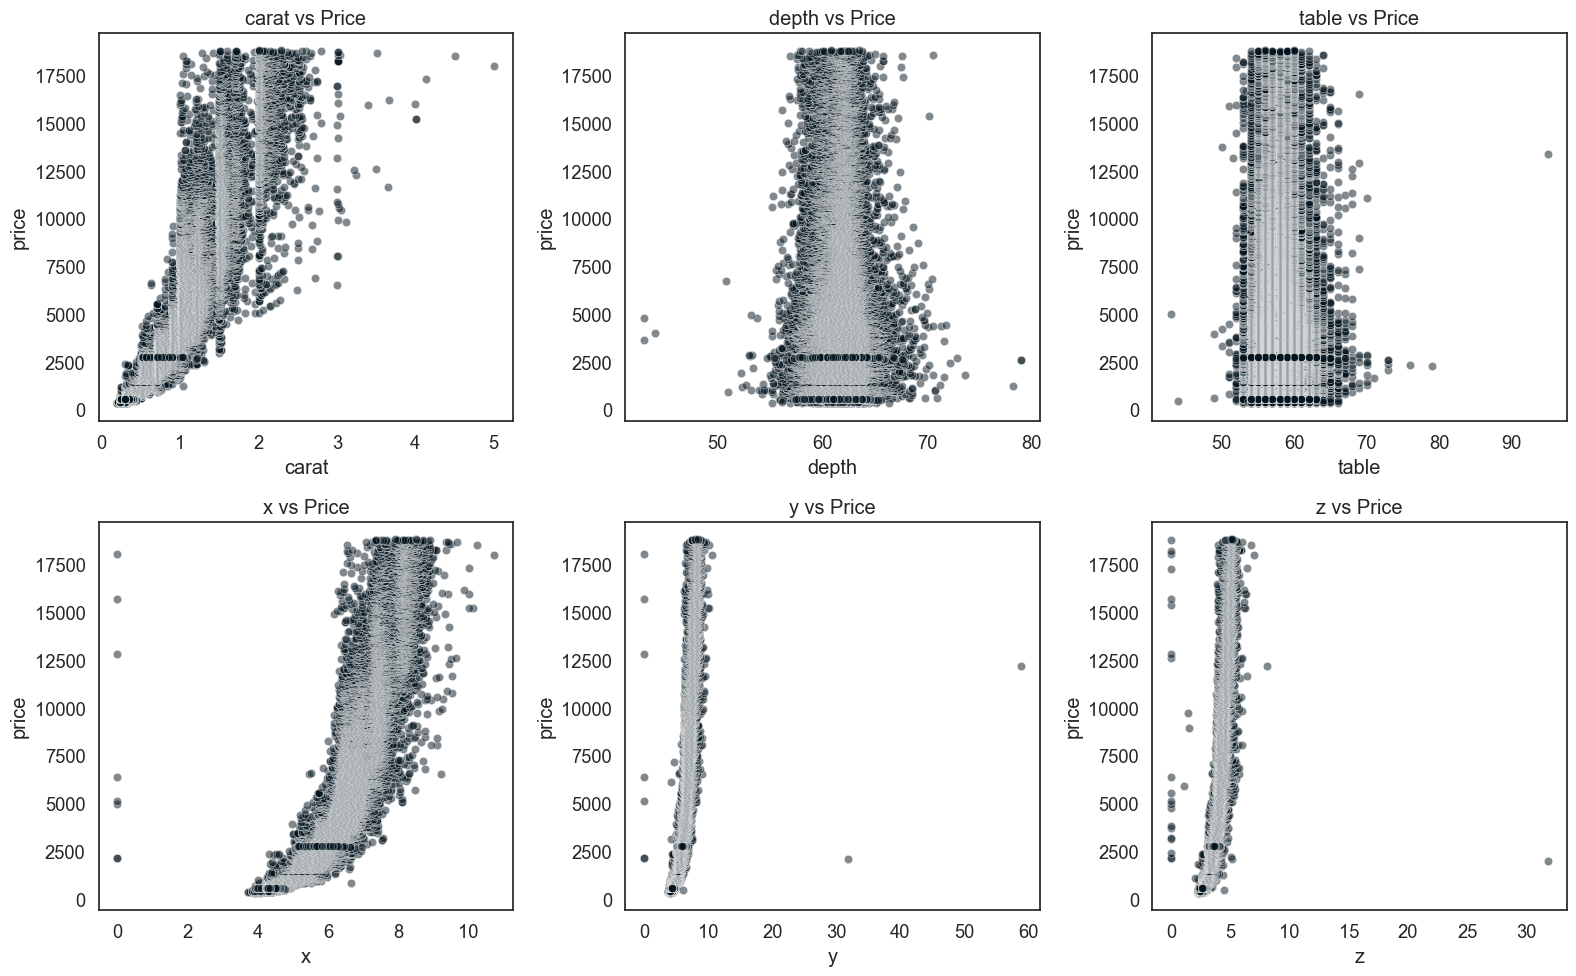

In [90]:
columns = diamonds.drop('price', axis=1)

plt.figure(figsize=(16, 10))
sns.set_style("white")
for i, column in enumerate(columns.select_dtypes([np.number])):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=diamonds, x=column, y='price', alpha= 0.5, color= '#04151F')
    plt.title(f'{column} vs Price')
    plt.grid(False)
    plt.tight_layout()

plt.show()


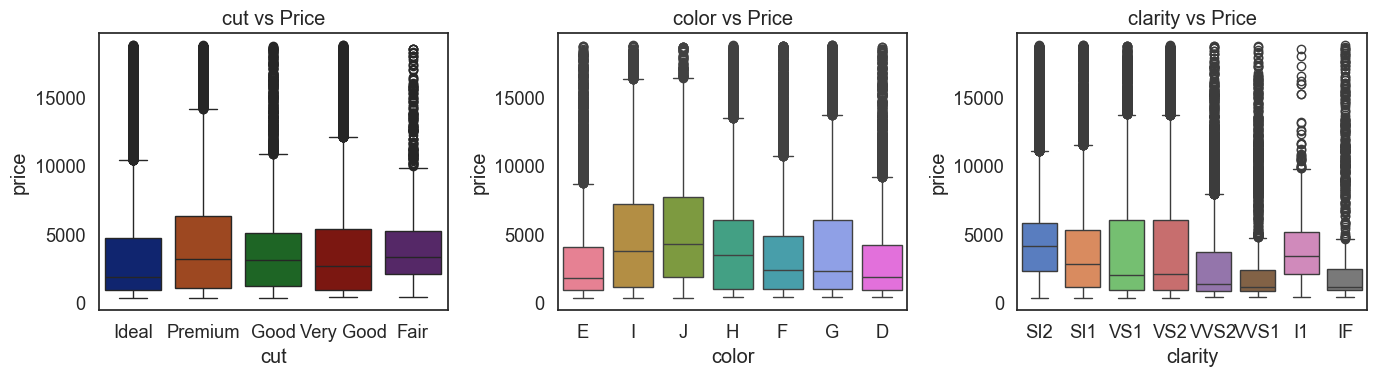

In [85]:
columns= diamonds.select_dtypes(['object'])
paletas = ['dark', 'husl', 'muted']
sns.set_style("white")
plt.figure(figsize=(14,4))

for i, (column, paleta) in enumerate(zip(columns,paletas)):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=diamonds, x=column, y= 'price', hue=column, palette=paleta)
    plt.title(f'{column} vs Price')
    plt.grid(False)
    plt.tight_layout()
    
plt.show()


In [3]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder()

In [4]:
x= diamonds.drop('price', axis=1)
y= diamonds['price']


In [5]:
x_categorical=x[['cut','color','clarity']]
x_encode= encoder.fit_transform(x_categorical)
x_encode= pd.DataFrame(x_encode.toarray(), columns= encoder.get_feature_names_out(x_categorical.columns))
x= pd.concat([x.drop(columns=x_categorical,axis=1),x_encode], axis=1)



In [6]:
x.head(2)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=18)


In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(43152, 26)
(10788, 26)
(43152,)
(10788,)


In [8]:
from sklearn.linear_model import LinearRegression
lineal_reg= LinearRegression()

In [9]:
lineal_reg.fit(x_train,y_train)

LinearRegression()

In [40]:
lineal_predict= lineal_reg.predict(x_test)


A la hora de evaluar los resultados de un modelo de regresión lineal, existen métricas que puedes utilizar, tales como:

1. Error absoluto medio (MAE): Calcula el promedio de las diferencias absolutas entre los valores predichos y los valores reales. Al igual que el MSE, un valor más bajo es mejor.

2. Coeficiente de correlación (R²): Indica cuánto de la variación en la variable dependiente puede explicarse por el modelo. R² varía entre 0 y 1, donde 1 indica una predicción perfecta y 0 indica que el modelo no explica nada de la variabilidad de la variable dependiente.

In [41]:
from sklearn.metrics import  mean_absolute_error, r2_score

mae = round(mean_absolute_error(y_test, lineal_predict),3)

r2 = round(r2_score(y_test, lineal_predict),3)

print("MAE:", mae)
print("R²:", r2)

MAE: 742.695
R²: 0.916


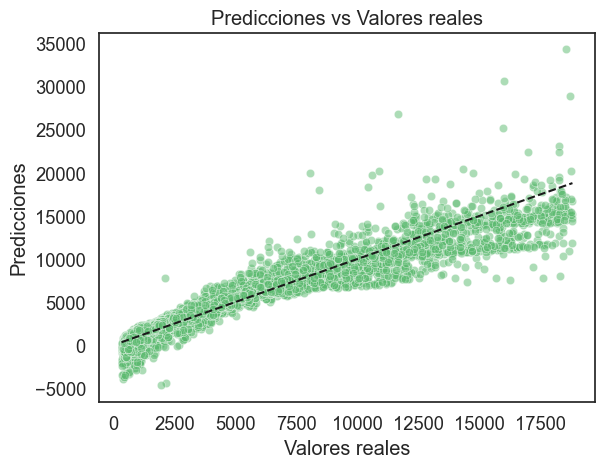

In [112]:
sns.set_style("white")
sns.scatterplot(x=y_test, y=lineal_predict, color= '#5BBA6F',alpha= 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.grid(False)

plt.show()


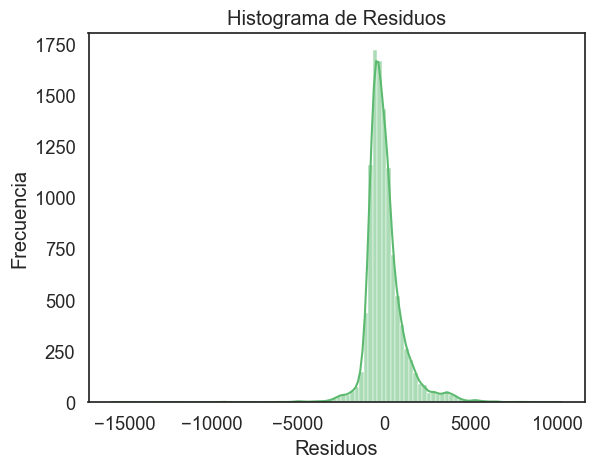

In [114]:
residuos = y_test - lineal_predict
sns.set_style("white")
sns.histplot(residuos, bins=100, color= '#5BBA6F', kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

In [37]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=22)

In [38]:
forest_reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [39]:
forest_predict= forest_reg.predict(x_test)

fmae = round(mean_absolute_error(y_test, forest_predict),3)

fr2 = round(r2_score(y_test, forest_predict),3)

print("MAE:", fmae)
print("R²:", fr2)

MAE: 270.261
R²: 0.982


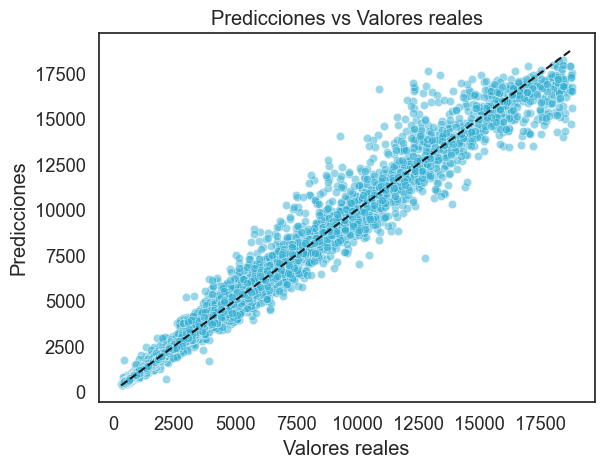

In [111]:
sns.set_style("white")
sns.scatterplot(x=y_test, y=forest_predict,color='#31AFD4',alpha= 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.show()


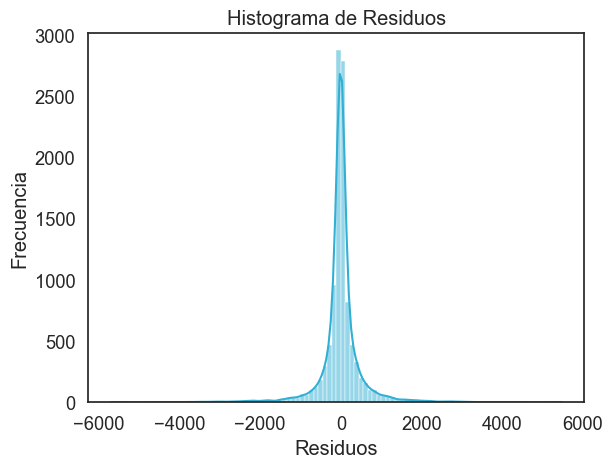

In [109]:
residuos = y_test - forest_predict
sns.set_style("white")
sns.histplot(residuos,color='#31AFD4', bins=100, kde= True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()